# 6 깊이너비우선 탐색

## 6-1 Queue

- 데이터를 보관하는 자료구조
- 입력하면 데이터가 순서적으로 쌓이고 데이터를 뺄때도 먼저 입력된 것부터 출력

In [1]:
from collections import deque

In [2]:
queue = deque()

In [3]:
queue.append(1); queue.append(2)

In [4]:
queue

deque([1, 2])

### 큐 꺼내기  : fifo 

- 선입선출 처리

In [5]:
queue.popleft()

1

In [6]:
queue

deque([2])

### Queue 모듈 사용하기

In [7]:
import queue
q=queue.Queue()
q.put('apple') #큐 객체에 데이터 입력
q.put('banana')
q.put(10)

In [8]:
q.qsize() #큐 객체에 저장된 데이터 갯수

3

In [9]:
q.get() #큐 객체에서 데이터 출력

'apple'

In [10]:
q.queue

deque(['banana', 10])

In [11]:
q.get()

'banana'

In [12]:
q.qsize() #2개 출력후 저장된 데이터 갯수

1

## 6-2 너비 우선 탐색 (Breadth-first-search, BFS)

### 그래프 정의

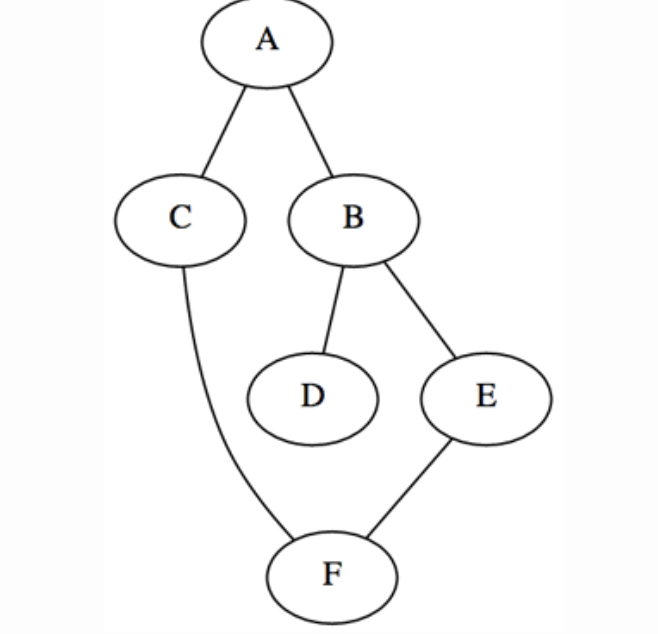

In [13]:
from IPython.display import Image
Image(filename='탐색.png', width= 300, height=300) 

In [14]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

###  큐를 사용해서 탐색

In [15]:
def bfs(graph, start):
    visited = []
    queue = [start]

    while queue:
        n = queue.pop(0)
        if n not in visited:
            visited.append(n)
            queue += graph[n] - set(visited)  # set(집합처리로 유일한 노드만 처리)
            print("visited", visited)
            print("queue", queue)
    return visited

In [16]:
bfs(graph, 'A')

visited ['A']
queue ['B', 'C']
visited ['A', 'B']
queue ['C', 'E', 'D']
visited ['A', 'B', 'C']
queue ['E', 'D', 'F']
visited ['A', 'B', 'C', 'E']
queue ['D', 'F', 'F']
visited ['A', 'B', 'C', 'E', 'D']
queue ['F', 'F']
visited ['A', 'B', 'C', 'E', 'D', 'F']
queue ['F']


['A', 'B', 'C', 'E', 'D', 'F']

## 6-3 stack
- 데이터를 관리하는 구조
- 데이터를 넣을 때는 순서대로 쌓이고 뺄때는 마지막 것부터 

In [17]:
stack =[]

In [18]:
stack.append(1)
stack.append(2)

In [19]:
stack

[1, 2]

In [20]:
stack.pop()

2

### 스택을 클래스로 만들기

- 객체를 생성할 때 데이터 보관장소 만들기
- 데이터를 관리하는 메소드 정의
- 데이터를 저장 및 빼오는 메소드 정의

In [21]:
class Stack:
    #리스트를 이용하여 스택 생성
    def __init__ (self):
        self.top = []
        
    #PUSH
    def push (self, item):
        self.top.append(item)
        
    #POP 메소드
    def pop(self):
        #if Stack is not empty
        if not self.isEmpty():
            #pop and return 
            return self.top.pop(-1)
        else:
            print("Stack underflow")
            
    #스택 초기화
    def clear(self):
        self.top=[]
        
    #스택이 비어있는지 확인
    def isEmpty(self):
        return len(self.top)==0
    
    #스택 크기 반환
    def size(self):
        return len(self.top)

In [22]:
st = Stack()

In [23]:
st.size()

0

In [24]:
st.isEmpty()

True

In [25]:
st.push(1); st.push(2)

In [26]:
st.size()

2

In [27]:
st.pop()

2

In [28]:
st.clear()

In [29]:
st.isEmpty()

True

In [30]:
st.pop()

Stack underflow


## 6-4 깊이 우선 탐색 (Depth-first-search, DFS)

### 스택을 사용해서 탐색 

In [31]:
def dfs(graph, start):
    visited = []
    stack = [start]

    while stack:
        n = stack.pop()
        if n not in visited:
            visited.append(n)
            stack += graph[n] - set(visited)   # 집합으로 유일한 결과만 처리
            print("visited", visited)
            print("stack", stack)
    return visited

In [32]:
dfs(graph, 'A')

visited ['A']
stack ['B', 'C']
visited ['A', 'C']
stack ['B', 'F']
visited ['A', 'C', 'F']
stack ['B', 'E']
visited ['A', 'C', 'F', 'E']
stack ['B', 'B']
visited ['A', 'C', 'F', 'E', 'B']
stack ['B', 'D']
visited ['A', 'C', 'F', 'E', 'B', 'D']
stack ['B']


['A', 'C', 'F', 'E', 'B', 'D']

## 6-5 [문제] 미로탈출 : BFS

- N * M 크기의 직사격형 형태의 미로에 갇혀있다. 
- 위치는 (1,1)이고 미로의 출구는 (N,M)의 위치에 존재 - 파이썬은 인덱스가 0이므로 (0,0)
- 한번에 한칸씩 이동
- 괴물은 0, 없는 1
- 탈출할 수 있는 최소 칸의 개수, 시작칸과 마지만 칸 계산 포함

###  입력예시 
> 5 6

> 101010

> 111111

> 000001

> 111111

> 111111

### 출력예시

> 10

In [33]:
from collections import deque

In [34]:
# N, M을 공백을 기준으로 구분하여 입력 받기
n, m = map(int, input().split())

5 6


In [40]:
# 2차원 리스트의 맵 정보 입력 받기
graph = []
for i in range(n):
    graph.append(list(map(int, input())))

101010
111111
000001
111111
111111


In [41]:
graph

[[1, 0, 1, 0, 1, 0],
 [1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1]]

In [42]:
# 이동할 네 가지 방향 정의 (상, 하, 좌, 우)
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

###  BFS 소스코드 구현

In [43]:
def bfs(x, y):
    queue = deque()                    # 큐(Queue) 구현을 위해 deque 라이브러리 사용
    queue.append((x, y))

    while queue:                       # 큐가 빌 때까지 반복하기
        x, y = queue.popleft()
        for i in range(4):             # 현재 위치에서 4가지 방향으로의 위치 확인
            nx = x + dx[i]
            ny = y + dy[i]
            if nx < 0 or nx >= n or ny < 0 or ny >= m:   # 미로 찾기 공간을 벗어난 경우 무시
                continue
            if graph[nx][ny] == 0:                       # 벽인 경우 무시
                continue
            if graph[nx][ny] == 1:                       # 해당 노드를 처음 방문하는 경우에만 최단 거리 기록
                graph[nx][ny] = graph[x][y] + 1
                queue.append((nx, ny))
    
    print(" graph ", graph)
    return graph[n - 1][m - 1]                            # 가장 오른쪽 아래까지의 최단 거리 반환

In [44]:
# BFS를 수행한 결과 출력
print(bfs(0, 0))

 graph  [[3, 0, 5, 0, 7, 0], [2, 3, 4, 5, 6, 7], [0, 0, 0, 0, 0, 8], [14, 13, 12, 11, 10, 9], [15, 14, 13, 12, 11, 10]]
10
